# 2022 COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the marker, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [2]:
# Preview of the data in the csv file, which has two columns: 
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head()

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...


In [3]:
# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

## 1.1. URL Removal
*related to the section 4.2*

In [4]:
# Please comment your code
import re
def remove_url(x):
    x = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', x)
    
    return x
    
training_posts = [remove_url(s) for s in training_posts]
testing_posts = [remove_url(s) for s in testing_posts]

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*



---



In [5]:
import re
import nltk
import numpy as np
#remove punctuation and convert to lower case

training_posts_lo = [s.lower() for s in training_posts]
testing_posts_lo = [s.lower() for s in testing_posts]

def remove_punctuation(x):
    x = re.sub(r'[^\w\s\_]','',x)
    
    return x

training_posts_re = [remove_punctuation(s) for s in training_posts_lo]
testing_posts_re = [remove_punctuation(s) for s in testing_posts_lo]

#tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

training_posts_to = [word_tokenize(s) for s in training_posts_re]
testing_posts_to = [word_tokenize(s) for s in testing_posts_re]

#print(training_posts[1])

#remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
#stop_words = nltk.corpus.stopwords.words('english')

training_posts_sw=[]
for tokens in training_posts_to:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    training_posts_sw.append(filtered_sentence)

testing_posts_sw=[]
for tokens in testing_posts_to:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    testing_posts_sw.append(filtered_sentence)
    
#print(training_posts_sw[1])

#lemmatisation
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

training_posts_le = []
for tokens in training_posts_sw:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    training_posts_le.append(lemma_sentence)

testing_posts_le = []
for tokens in testing_posts_sw:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    testing_posts_le.append(lemma_sentence)

#print(training_posts_le[1])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [9]:
# Please comment your code
import re
import nltk
import numpy as np
#remove punctuation and convert to lower case
from gensim.models import Word2Vec
from gensim.models import FastText

#4.1
#ft_cbow_model = FastText(sentences = training_posts_to, size=50, window=5, min_count=5, workers=2, sg=1)
#ft_cbow_model1 = FastText(sentences = training_posts_to, size=100, window=5, min_count=5, workers=2, sg=1)
ft_cbow_model2 = FastText(sentences = training_posts_to, size=150, window=5, min_count=5, workers=2, sg=1)
#ft_cbow_model3 = FastText(sentences = training_posts_to, size=175, window=5, min_count=5, workers=2, sg=1)
#ft_cbow_model4 = FastText(sentences = training_posts_to, size=100, window=2, min_count=5, workers=2, sg=1)
#ft_cbow_model5 = FastText(sentences = training_posts_to, size=100, window=8, min_count=5, workers=2, sg=1)
#ft_cbow_model6 = FastText(sentences = training_posts_to, size=100, window=10, min_count=5, workers=2, sg=1)

#4.4
gensim_model2 = Word2Vec(sentences = training_posts_sw, size=100, window=5, min_count=1, workers=2, sg=1)

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [10]:
# Please comment your code
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-50")
#word_emb_model = api.load("glove-twitter-25")

## 2.3. Input Concatenation
*related to the section 4.3*

In [11]:
# Please comment your code
# Get the unique training word list (i.e. vocab)
from sklearn.preprocessing import LabelEncoder

word_set = set() 
for sent in training_posts_sw:
    for word in sent:
        word_set.add(word)
          

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')
        
word_list = list(word_set)
word_list.sort()

print(word_list[:10])
print(len(word_list))

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

# download another pre-trained word embedding
emb_dim = word_emb_model.vector_size+gensim_model2.vector_size
print(emb_dim)

# add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        #emb_table.append(np.concatenate((word_emb_model[word],word_emb_model2[word]),0))
        emb_table.append(np.concatenate((word_emb_model[word],gensim_model2.wv[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
print(np.shape(emb_table))

['0', '00', '000', '0000', '000000', '000000000', '00000011', '000000111', '0000001111you', '00001010']
238342
150
(238342, 150)


# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [12]:
# Please comment your code

import torch
# You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Convert the training_posts_sw to the word index that aligns with the lookup table
len_list = [len(s) for s in training_posts_sw]
seq_length = max(len_list)
len_list_t = [len(s) for s in testing_posts_sw]
seq_length_t = max(len_list_t)


# Padding and encoding
def encode_and_add_padding(training_posts_sw, seq_length, word_index):
    sent_encoded = []
    for sent in training_posts_sw:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
    return sent_encoded

train_pad_encoded = encode_and_add_padding(training_posts_sw, seq_length, word_index)
test_pad_encoded = encode_and_add_padding(testing_posts_le, seq_length_t, word_index)
print(np.asarray(train_pad_encoded).shape)

#lable encoding
from sklearn.preprocessing import LabelEncoder

lEnc = LabelEncoder()
# Encode the labels 
label_train_encoded = lEnc.fit_transform(training_labels)
label_test_encoded = lEnc.fit_transform(testing_labels)
unique_labels = np.unique(label_train_encoded)

print(np.asarray(label_train_encoded).shape)

#Paramater
vocab_size = len(word_list)
n_hidden = 100
total_epoch = 50
learning_rate = 0.01
n_class = len(unique_labels)
batch_size = 256
n_input = np.array(train_pad_encoded).shape[1]
# Bi-RNN model
class Bi_RNN_Model(nn.Module):
    def __init__(self):
        super(Bi_RNN_Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        self.rnn = nn.RNN(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(2*n_hidden,n_class)

    def forward(self, x):
        x = self.emb(x) 
        x, h_n = self.rnn(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)
        return output
    
# Bi-LSTM model
class Bi_LSTM_Model(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first = True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2,n_class)

    def forward(self, x):
        x = self.emb(x)        
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

RNN_model = Bi_RNN_Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_R = optim.Adam(RNN_model.parameters(), lr=learning_rate)

LSTM_model = Bi_LSTM_Model().to(device)
optimizer_L = optim.Adam(LSTM_model.parameters(), lr=learning_rate)


(7808, 937)
(7808,)


### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [13]:
# Please comment your code
 #RNN  
print("_____RNN_____")
for epoch in range(total_epoch):
    for ind in range(0,np.array(train_pad_encoded).shape[1],batch_size):
        input_batch = np.array(train_pad_encoded)[ind:min(ind+batch_size, np.array(train_pad_encoded).shape[1])]
        target_batch = np.array(label_train_encoded)[ind:min(ind+batch_size, np.array(train_pad_encoded).shape[1])]
        input_batch_torch = torch.from_numpy(input_batch).to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)



        RNN_model.train()

        optimizer_R.zero_grad()
        outputs = RNN_model(input_batch_torch)
        #target_batch_torch = target_batch_torch.to(torch.int64)
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer_R.step()

    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training RNN')

torch.save(LSTM_model,'Ass1RNN.pt')

# Please comment your code
from sklearn.metrics import accuracy_score
#LSTM
print("_____LSTM_____")
for epoch in range(total_epoch):
    for ind in range(0,np.array(train_pad_encoded).shape[1],batch_size):
        input_batch = np.array(train_pad_encoded)[ind:min(ind+batch_size, np.array(train_pad_encoded).shape[1])]
        target_batch = np.array(label_train_encoded)[ind:min(ind+batch_size, np.array(train_pad_encoded).shape[1])]
        input_batch_torch = torch.from_numpy(input_batch).to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)



        LSTM_model.train()

        optimizer_L.zero_grad()
        outputs = LSTM_model(input_batch_torch)
        #target_batch_torch = target_batch_torch.to(torch.int64)
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer_L.step()

    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training lstm')

torch.save(LSTM_model,'Ass1LSTM.pt')

_____RNN_____
Epoch: 1, loss: 0.76625, train_acc: 0.48
Epoch: 2, loss: 0.72449, train_acc: 0.50
Epoch: 3, loss: 0.68891, train_acc: 0.51
Epoch: 4, loss: 0.70846, train_acc: 0.53
Epoch: 5, loss: 0.67052, train_acc: 0.60
Epoch: 6, loss: 0.69097, train_acc: 0.54
Epoch: 7, loss: 0.72298, train_acc: 0.50
Epoch: 8, loss: 0.69049, train_acc: 0.55
Epoch: 9, loss: 0.68357, train_acc: 0.57
Epoch: 10, loss: 0.69040, train_acc: 0.53
Epoch: 11, loss: 0.69969, train_acc: 0.57
Epoch: 12, loss: 0.74408, train_acc: 0.47
Epoch: 13, loss: 0.68274, train_acc: 0.56
Epoch: 14, loss: 0.70015, train_acc: 0.54
Epoch: 15, loss: 0.73360, train_acc: 0.50
Epoch: 16, loss: 0.73693, train_acc: 0.49
Epoch: 17, loss: 0.71238, train_acc: 0.53
Epoch: 18, loss: 0.76946, train_acc: 0.49
Epoch: 19, loss: 0.72065, train_acc: 0.47
Epoch: 20, loss: 0.76060, train_acc: 0.50
Epoch: 21, loss: 0.68339, train_acc: 0.53
Epoch: 22, loss: 0.73882, train_acc: 0.49
Epoch: 23, loss: 0.67398, train_acc: 0.56
Epoch: 24, loss: 0.75764, tra

# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

I select it since it has better performance in rare words problems. According to the result I generate, The skip-gram model with a high word vector gives better syntactic accuracy, and the semantic accuracy remains stable. We keep the vector dimension at 100, and increase the windows size, the semantic accuracy slight growth, and syntactic accuracy drops a bit. This is because the windows size and vector size relate to the context of the words. Bigger windows and vector size would give the model more features as input to train the model.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued',

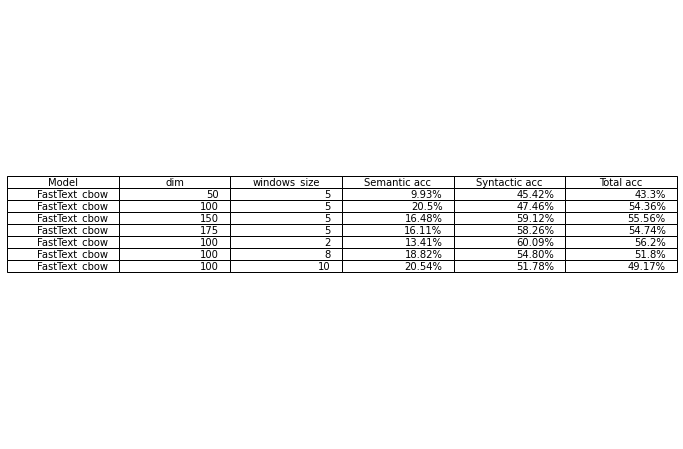

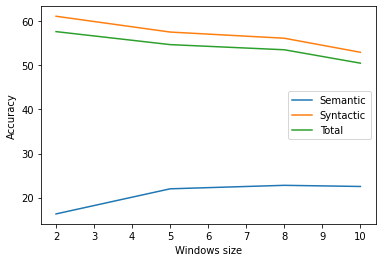

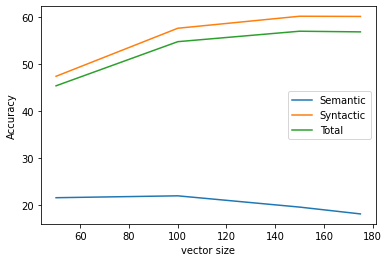

In [14]:
#Word analogy evaluation for section 4.1
import numpy as np
import re
# For parsing our XML data
from lxml import etree 

# For data processing
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

# For implementing the word2vec family of algorithms
from gensim.models import Word2Vec
id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ted_en-20160408.xml') 


targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(sentences[:10])

ft_cbow_model2.wv.save_word2vec_format('ted_ft_cbow_w2v.txt', binary=False)

!git clone https://github.com/stanfordnlp/GloVe.git

vectors_file="/content/ted_ft_cbow_w2v.txt"

with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}

# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T

def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1,figsize=(12,8))
data=[["FastText_cbow", "50","5","9.93%","45.42%","43.3%"],
      ["FastText_cbow", "100","5","20.5%","47.46%","54.36%"],
      ["FastText_cbow", "150","5","16.48%","59.12%","55.56%"],
      ["FastText_cbow", "175","5","16.11%","58.26%","54.74%"],
      ["FastText_cbow", "100","2","13.41%","60.09%","56.2%"],
      ["FastText_cbow", "100","8","18.82%","54.80%","51.8%"],
      ["FastText_cbow", "100","10","20.54%","51.78%","49.17%"],]
column_labels=["Model", "dim", "windows_size", "Semantic acc", "Syntactic acc", "Total acc" ]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

# vector size is 100
x = [2,5,8,10]
y1 = [16.29,21.99,22.78,22.52]
y2 = [61.16,57.57,56.17,52.98]
y3 = [57.67,54.72,53.55,50.51]

plt.ylabel('Accuracy')
plt.xlabel('Windows size')
plt.plot(x, y1, label = "Semantic")
plt.plot(x, y2, label = "Syntactic")
plt.plot(x, y3, label = "Total")
plt.legend()
plt.show()

# windows size is 5
x = [50,100,150,175]
y1 = [21.59,21.99,19.6,18.15]
y2 = [47.37,57.57,60.12,60.08]
y3 = [45.35,54.72,56.94,56.8]

plt.ylabel('Accuracy')
plt.xlabel('vector size')
plt.plot(x, y1, label = "Semantic")
plt.plot(x, y2, label = "Syntactic")
plt.plot(x, y3, label = "Total")
plt.legend()
plt.show()

## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)
In order to find best proformance with different data processing techiques. I choose four different combinations, with URL, without URL, with lemmatize and without lemmatize. The test with URL and without lemmatize gives the best f1 score. This is because removing url reduces the distraction value. In contrast, lemmatization would reduce inflections or variant forms to the base form. Which would reduce the word list and lead to OOD problems.


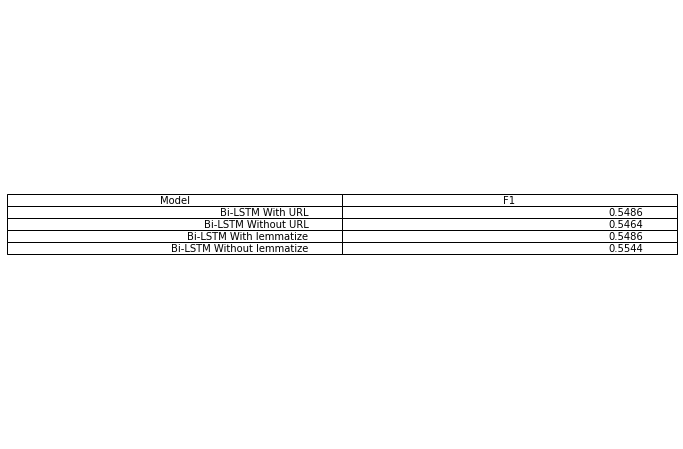

In [15]:
# Please comment your code
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1,figsize=(12,8))
data=[["Bi-LSTM With URL", "0.5486"],
      ["Bi-LSTM Without URL", "0.5464"],
      ["Bi-LSTM With lemmatize", "0.5486"],
     ["Bi-LSTM Without lemmatize", "0.5544"]]
column_labels=["Model", "F1"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)
In order to measure the perfomance and different input. We use Word2Vec(skip-gram model) with 100 vector size and 5 windows size. And compare the result in bi-lstm model between 6 different input combinations. The combination with pre-trained twitter 50 and  Word2Vec(skip-gram model) gives the best performance. Because this combination would give the highest input feature dimension.

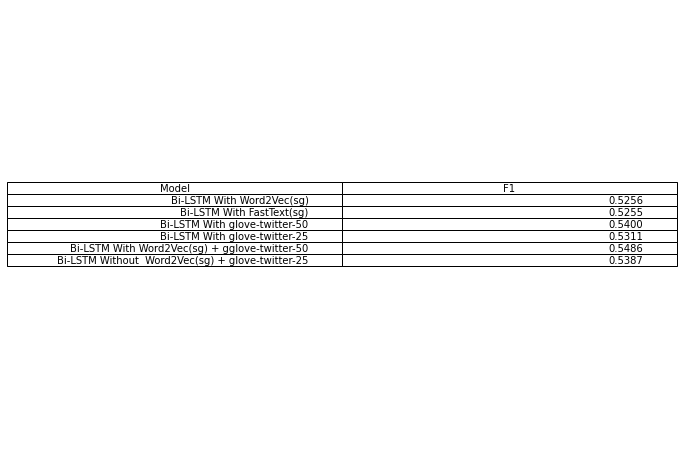

In [16]:
# Please comment your code
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1,figsize=(12,8))
data=[["Bi-LSTM With Word2Vec(sg)", "0.5256"],
      ["Bi-LSTM With FastText(sg)", "0.5255"],
      ["Bi-LSTM With glove-twitter-50", "0.5400"],
      ["Bi-LSTM With glove-twitter-25", "0.5311"],
      ["Bi-LSTM With Word2Vec(sg) + gglove-twitter-50", "0.5486"],
     ["Bi-LSTM Without  Word2Vec(sg) + glove-twitter-25", "0.5387"]]
column_labels=["Model", "F1"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)
We compare the performance of bi_rnn and bi_lstm. Bi_ltsm has a better F1 score than bi_rnn. Compared to rnn, LSTM added a memory cell that can maintain information in memory for long periods of time. A set of gates controls the input and output of information and when it's forgotten. This architecture lets the model learn longer-term dependencies from the dataset. 

____RNN____
              precision    recall  f1-score   support

           0     0.5427    0.8030    0.6477       467
           1     0.4773    0.2100    0.2917       400

    accuracy                         0.5294       867
   macro avg     0.5100    0.5065    0.4697       867
weighted avg     0.5125    0.5294    0.4834       867

____LSTM____
              precision    recall  f1-score   support

           0     0.5666    0.5739    0.5702       467
           1     0.4949    0.4875    0.4912       400

    accuracy                         0.5340       867
   macro avg     0.5308    0.5307    0.5307       867
weighted avg     0.5335    0.5340    0.5338       867



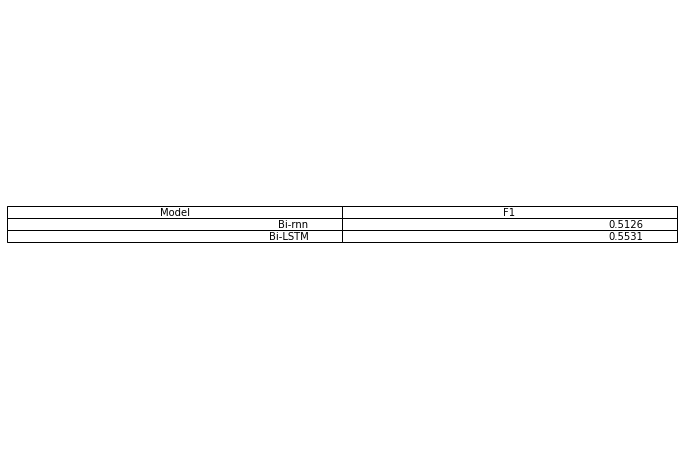

In [17]:
# Output for 4.2 (without URL) 4.3 and 4.4 Word2Vec(sg) + glove-twitter-50, vector size = 100, windows = 5
# Prediction RNN
print("____RNN____")
RNN_model.eval()
outputs = RNN_model(torch.from_numpy(np.array(test_pad_encoded)).to(device)) 
predicted = torch.argmax(outputs, 1)
from sklearn.metrics import classification_report
print(classification_report(label_test_encoded, predicted.cpu().numpy(),digits=4))
# Prediction lstm
print("____LSTM____")
LSTM_model.eval()
outputs = LSTM_model(torch.from_numpy(np.array(test_pad_encoded)).to(device)) 
predicted = torch.argmax(outputs, 1)
from sklearn.metrics import classification_report
print(classification_report(label_test_encoded,predicted.cpu().numpy(),digits=4))

#grath
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1,figsize=(12,8))
data=[["Bi-rnn", "0.5126"],
     ["Bi-LSTM", "0.5531"]]
column_labels=["Model", "F1"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)
In this section, I select learning rates between 0.01, 0.005 and 0.001, and run in different epochs. Generally, bigger epochs would converge to a more stable model exemplified by lower variance. However, it's not shown in our result. There is no significant difference between bigger and small epochs when the epoch is bigger than 20. Speak to the learning rate. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs. Our study shows that when the epoch is lower than 20, The lower learning rate will affect the result.


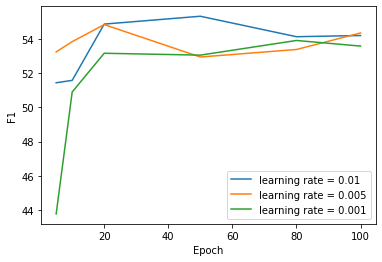

In [35]:
# Please comment your code
# Please comment your code
import matplotlib.pyplot as plt
x = [5,10,20,50,80,100]
y1 = [51.45,51.59,54.89,55.35,54.15,54.22]
y2 = [53.26,53.86,54.86,52.96,53.40,54.37]
y3 = [43.76,50.91,53.18,53.07,53.93, 53.60]
plt.ylabel('F1')
plt.xlabel('Epoch')
plt.plot(x, y1, label = "learning rate = 0.01")
plt.plot(x, y2, label = "learning rate = 0.005")
plt.plot(x, y3, label = "learning rate = 0.001")
plt.legend()
plt.show()

#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [36]:
#@markdown ---
text = 'I think logic'  #@param {type: "string"}

#@markdown ---
import pandas as pd
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import gensim.downloader as api
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")

# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()
#remove URL
def remove_url(x):
    x = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', x)
    
    return x
training_posts = [remove_url(s) for s in training_posts]
testing_posts = [remove_url(s) for s in testing_posts]

#remove punctuation and convert to lower case

training_posts_lo = [s.lower() for s in training_posts]
testing_posts_lo = [s.lower() for s in testing_posts]

def remove_punctuation(x):
    x = re.sub(r'[^\w\s\_]','',x)
    
    return x

training_posts_re = [remove_punctuation(s) for s in training_posts_lo]
testing_posts_re = [remove_punctuation(s) for s in testing_posts_lo]

#tokenization

training_posts_to = [word_tokenize(s) for s in training_posts_re]
testing_posts_to = [word_tokenize(s) for s in testing_posts_re]

#remove stopwords

stop_words = set(stopwords.words('english'))
#stop_words = nltk.corpus.stopwords.words('english')

training_posts_sw=[]
for tokens in training_posts_to:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    training_posts_sw.append(filtered_sentence)

testing_posts_sw=[]
for tokens in testing_posts_to:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    testing_posts_sw.append(filtered_sentence)

#GET worf3vec(sg)
gensim_model2 = Word2Vec(sentences = training_posts_sw, size=100, window=5, min_count=1, workers=2, sg=1)

word_emb_model = api.load("glove-twitter-50")

#build word list
word_set = set() 
for sent in training_posts_sw:
    for word in sent:
        word_set.add(word)
          
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')
        
word_list = list(word_set)
word_list.sort()

#build word index
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = word_emb_model.vector_size+gensim_model2.vector_size
# add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(np.concatenate((word_emb_model[word],gensim_model2.wv[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)


# Convert the training_posts_le to the word index that aligns with the lookup table
len_list = [len(s) for s in training_posts_sw]
seq_length = max(len_list)
len_list_t = [len(s) for s in testing_posts_sw]
seq_length_t = max(len_list_t)


# Padding and encoding
#train and text encoding
def encode_and_add_padding(training_posts_sw, seq_length, word_index):
    sent_encoded = []
    for sent in training_posts_sw:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
    return sent_encoded

train_pad_encoded = encode_and_add_padding(training_posts_sw, seq_length, word_index)
test_pad_encoded = encode_and_add_padding(testing_posts_sw, seq_length_t, word_index)


#lable encoding
lEnc = LabelEncoder()
# Encode the labels 
label_train_encoded = lEnc.fit_transform(training_labels)
label_test_encoded = lEnc.fit_transform(testing_labels)
unique_labels = np.unique(label_train_encoded)

#Paramater
vocab_size = len(word_list)
n_hidden = 100
total_epoch = 50
learning_rate = 0.01
n_class = len(unique_labels)
batch_size = 256
n_input = np.array(train_pad_encoded).shape[1]
    
# Bi-LSTM model
class Bi_LSTM_Model(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first = True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2,n_class)

    def forward(self, x):
        x = self.emb(x)        
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

criterion = nn.CrossEntropyLoss()
LSTM_model = Bi_LSTM_Model().to(device)
optimizer_L = optim.Adam(LSTM_model.parameters(), lr=learning_rate)

#LSTM
print("_____LSTM_____")
for epoch in range(total_epoch):
    for ind in range(0,np.array(train_pad_encoded).shape[1],batch_size):
        input_batch = np.array(train_pad_encoded)[ind:min(ind+batch_size, np.array(train_pad_encoded).shape[1])]
        target_batch = np.array(label_train_encoded)[ind:min(ind+batch_size, np.array(train_pad_encoded).shape[1])]
        input_batch_torch = torch.from_numpy(input_batch).to(device)
        target_batch_torch = torch.from_numpy(target_batch).view(-1).to(device)
        
        LSTM_model.train()

        optimizer_L.zero_grad()
        outputs = LSTM_model(input_batch_torch)
        #target_batch_torch = target_batch_torch.to(torch.int64)
        loss = criterion(outputs, target_batch_torch)
        loss.backward()
        optimizer_L.step()

    predicted = torch.argmax(outputs, -1)
    acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training lstm')

torch.save(LSTM_model,'Ass1LSTM_S5.pt')

def data_processing(x):
    x = re.sub(r'[^\w\s\_]','',x.lower())
    
    return x

text_re = data_processing(text)
text_to = word_tokenize(text_re)

text_sw=[]
for tokens in text_to:
    if not tokens in stop_words:
        text_sw.append(tokens)

def encode_and_add_padding_interface(text_sw, seq_length, word_index):
    sent_encoded = set()
    temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in text_sw]
    if len(temp_encoded) < seq_length:
        temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
    sent_encoded.add(tuple(temp_encoded))   
    sent_encoded = list(sent_encoded)
    return sent_encoded

text_pad_encoded = encode_and_add_padding_interface(text_sw, seq_length, word_index)

try:
    model = torch.load('Ass1LSTM_S5.pt')
    model.eval()
    outputs = model(torch.from_numpy(np.array(text_pad_encoded)).to(device)) 
    predicted = torch.argmax(outputs, 1).cpu().numpy()
    if predicted == [0]:
      print("The predicted personality type is: T")
    if predicted == [1]:
      print("The predicted personality type is: F")
except:
    print("Unfortunately, the word you entered is not in our dictionary. Please try another one and good luck!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than

# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 